mean radius 0.005847953216374213
mean texture 0.0
mean perimeter 0.0
mean area 0.011695906432748537
mean smoothness 0.011695906432748537
mean compactness 0.011695906432748537
mean concavity 0.005847953216374213
mean concave points 0.005847953216374213
mean symmetry 0.005847953216374213
mean fractal dimension 0.005847953216374213
radius error -0.005847953216374324
texture error 0.0
perimeter error 0.0
area error 0.011695906432748537
smoothness error 0.0
compactness error 0.005847953216374213
concavity error 0.0
concave points error 0.005847953216374213
symmetry error 0.0
fractal dimension error -0.011695906432748537
worst radius 0.0
worst texture 0.005847953216374213
worst perimeter 0.0
worst area 0.0
worst smoothness -0.005847953216374324
worst compactness -0.005847953216374324
worst concavity 0.0
worst concave points 0.005847953216374213
worst symmetry 0.0
worst fractal dimension 0.0


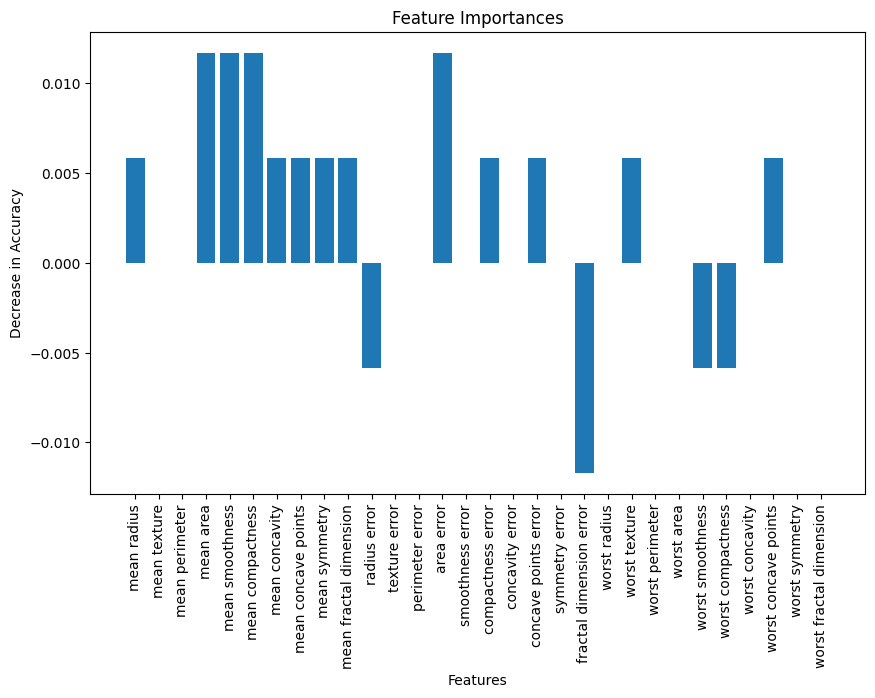

In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load sample data
X, y = load_breast_cancer(return_X_y=True)
feature_names = load_breast_cancer().feature_names
X_df = pd.DataFrame(X, columns=feature_names)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.3, random_state=1)

# Train a random forest model
rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(X_train, y_train)

# Get baseline accuracy on test data
base_acc = accuracy_score(y_test, rf.predict(X_test))

# Initialize empty list to store importances
importances = []

# Iterate over all columns and remove one at a time
for i in X_train.columns:
    X_temp_train = X_train.drop(columns=[i])
    X_temp_test = X_test.drop(columns=[i])
    rf.fit(X_temp_train, y_train)
    acc = accuracy_score(y_test, rf.predict(X_temp_test))
    importances.append((i, base_acc - acc))
    print(i, base_acc - acc)

# Separate the feature names and their importances
feature_names, scores = zip(*importances)

# Plot importance scores
plt.figure(figsize=(10, 6))
plt.bar(feature_names, scores)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Decrease in Accuracy')
plt.title('Feature Importances')
plt.show()


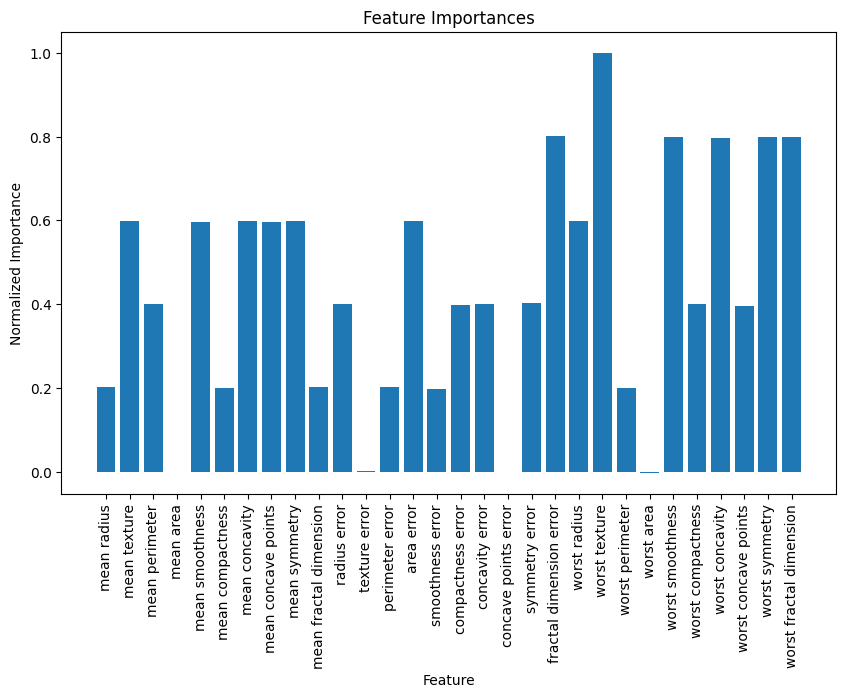

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
from joblib import Parallel, delayed

# Load sample data
X, y = load_breast_cancer(return_X_y=True)
feature_names = load_breast_cancer().feature_names

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Train a random forest model
rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(X_train, y_train)

# Get baseline accuracy using cross-validation
base_acc = np.mean(cross_val_score(rf, X_train, y_train, cv=5))

def evaluate_feature(i):
    X_temp = np.delete(X_train, i, axis=1)
    acc = np.mean(cross_val_score(rf, X_temp, y_train, cv=5))
    return base_acc - acc

# Parallel computation of feature importances
importances = Parallel(n_jobs=-1)(delayed(evaluate_feature)(i) for i in range(X_train.shape[1]))

# Normalize importances
importances_normalized = [imp / max(importances) for imp in importances]

# Plot importance scores
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances_normalized)), importances_normalized, tick_label=feature_names)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Normalized Importance')
plt.title('Feature Importances')
plt.show()
